# 1. 逆变换方法

### 1.1概念解释
1、PDF(Probability Density Function)

2、PMF(Probability Mass Function) 离散型随机变量分布律

3、CDF(Cumulative Distribution Function) 


### 1.2连续型分布计算步骤

1、设U为PDF的积分，即一个分布函数 (**计算的难点：如何把积分求出来，如果积分求不出来可以使用后面的方法**)

2、对分布函数求逆，得到x(U)，即算出一个x关于U的函数

3、构造符合均匀分布的sample向量  (**code:runif(num, start, stop)**）

4、代入x(U)，即可得到对应随机数啦~

5、加分项：绘制结果的频数直方图hist + 密度函数曲线lines

### 1.3连续型例题

<div align="center">
	<img src="1.png" width="40%">
</div>

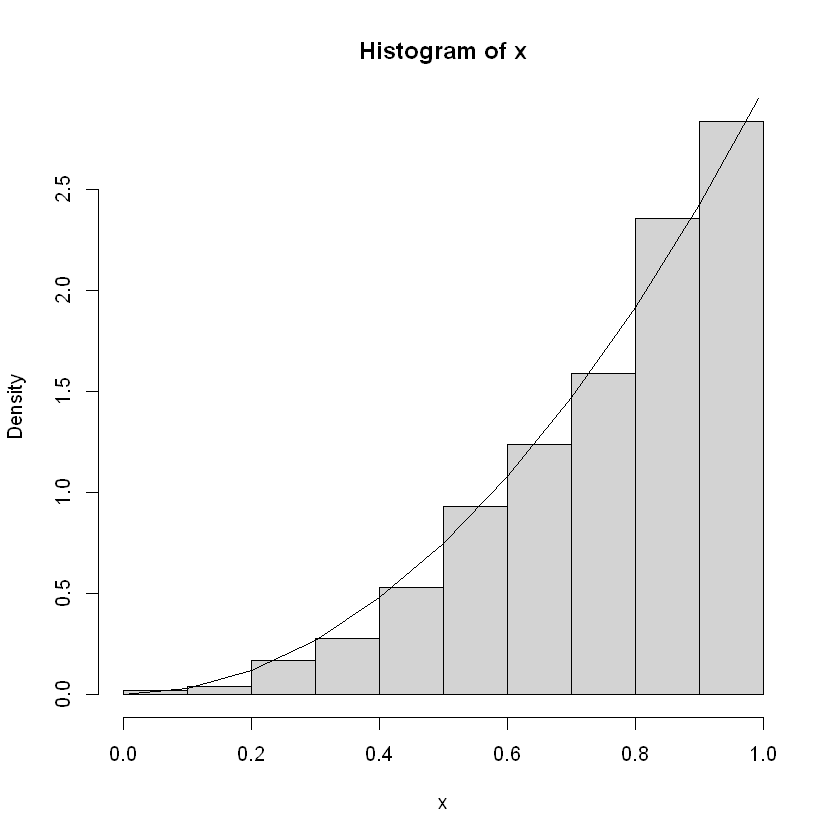

In [2]:
U = runif(1000,0,1)  # 生成1000个服从[0,1]均匀分布的随机数
x = U^(1/3)   # 这个需要你自己算啊，分布的逆
hist(x, prob = TRUE)  # 频数直方图
lines(seq(0,1,0.1) ,3 * seq(0,1,0.1) ^ 2)  # 绘制密度函数，这是原本的分布
# 可看到生成的随机数确实来自原始分布

### 1.4原理推导

<div align="center">
	<img src="2.png" width="40%">
</div>

**个人理解**：这个很好解释，首先等式右边的式子代表的是用原始分布的逆分布对随机变量U求出来的一个分布，就是我们最终要求的随机数的分布，本质上不是概率，就是一个CDF而已。等式右边第一行是对$F_{X}^{-1}(U)$进行数学公式表达，它就是使原始分布中累积概率等于U的最小的变量。这里使用inf是为了说明这个方法没有失效的情况吧，因为如果使用min的话，那其实有时候最小值根本不存在，但是下确界是肯定存在的。等式右边第二行，则是因为CDF肯定是单增的，这里还是连续的，自然可以做这种变换。后面的步骤显而易见，一个是将概率形式转换为分布函数，一个是均匀分布的特性。

### 1.5离散型分布计算步骤

1、对照列联表，写出分布函数

2、分布函数求逆函数x(U)（**注意区间的开闭**）

3、构造符合均匀分布的随机向量U

4、代入x(U)，即可得到对应随机数

5、加分项：再做一个列联表，看看频率

### 1.6离散型例题1

<div align="center">
	<img src="3.png" width="40%">
</div>

In [17]:
x = seq(0, 4, 1) # 根据X的取值范围生成,0-4的数据
p = c(0.1, 0.2, 0.2, 0.2, 0.3) # 得到列联表
FF = c(0,cumsum(p)) #累加得到分布函数，注意这里是左闭右开的
y1 = integer(1000)  # 生成一个和U等长的逻辑向量，可以理解为一个全是FALSE的向量。主要是为了后面对数据按条件赋值
u = runif(n)  # 生成均匀分布的随机数
for(i in 1:length(FF)-1){  # u代入逆运算的结果。FF是从零到一的，减去1才是分段函数的段数。通过循环，一段一段地赋值。
  ind = u>FF[i] & u<=FF[i+1]  # 一个布尔值，长度就是U的向量长度，满足这个条件的是TRUE，不满足的是FALSE
  y1[ind]=x[i] # 1000个数中TRUE位置的数据变成对应的x的值，FALSE的不变
}
table(y1)/n   # 计算频数，得到一个列联表，和原始的列联表很像

y1
    0     1     2     3     4 
0.094 0.201 0.222 0.204 0.279 

### 1.7离散型例题2

使用逆变换方法生成参数p=1/4的随机几何分布样本。

**解题思路**：几何分布就是指在伯努利实验中，前k-1次皆失败，第k次成功的概率。参数是成功的概率，为p。它的期望为1/p，方差为(1-p)/(p的平方)。它的分布律为：
$$P\left(N=n\right)=\left(1-p\right)^{k-1}p,k=1,2,\cdot\cdot\cdot$$
因此它的累计分布函数为
$$\mathrm{{F}}({n})=\mathrm{{P}}({ N}\leq{ n})=1-\mathrm{{P}}({N}\gt{ n})=1-\mathrm{{P}}(前n次试验都失败)=1-(1-{\mathrm{p}})^{n}$$
令它等于U然后求解，但是注意累积分布函数是左闭右开的：
$$1-q^{x}\lt u\leq1-q^{x+1}$$
我们取等号的一方，最终x(U)函数如下：
$$x\,+\,1\,=\,\left[\,\log(1\,-\,u)/\log(q)\right]$$

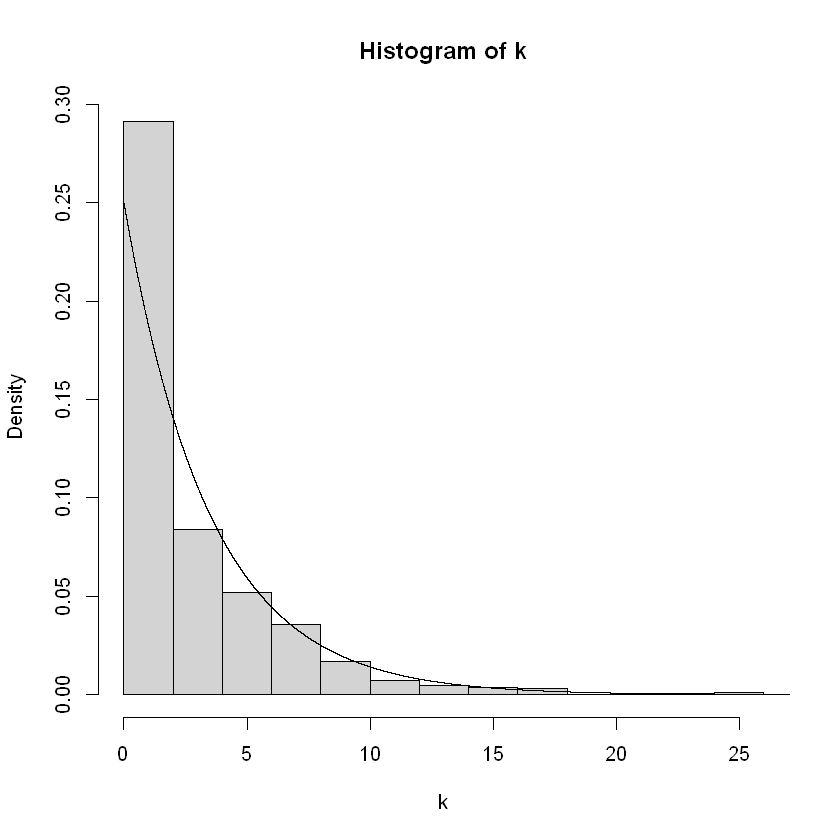

In [19]:
p = 0.25
u = runif(1000) 
k = ceiling(log(1-u)/log(1-p))-1 
# k = floor(log(1-u)/log(1-p)) 
hist(k ,prob = TRUE) 
y = seq(0,30,0.001) 
lines(y,p*(1-p)^y)

# 2.舍选法

### 2.1直观原理解释
**直观理解**：在下图中，红色的线代表我们关注的分布，我们想要得到服从这个分布的随机数。但是这个分布的数学表达不是很容易获得。我们的想法是，使用一个建议分布，即黄色的线，来逼近它。

<div align="center">
	<img src="4.png" width="40%">
</div>

所以，建议分布只是获得目标密度函数曲线下均匀分布样本的一个辅助工具。目标分布f(x)与建议分布g(x)、常数c需要满足以下条件：

1、建议分布g(x)获得方便

2、$\mathbf{f}\left(\mathbf{x}\right)\,\mathbf{\,}\leq\,\mathbf{c}\mathbf{g}\left(\mathbf{x}\right)$ 

(**个人理解**：第二条为了让建议分布和原始分布的形状相似，可能就是说，让这个建议分布进行某个倍数的缩放后能够完全包含原始分布，这样理解的话这个**常数c在满足条件的情况下不应该太大**)


### 2.2计算步骤与统计推导
1、生成随机样本x服从g(x)，然后根据$\mathbf{f}\left(\mathbf{x}\right)\,\mathbf{\,}\leq\,\mathbf{c}\mathbf{g}\left(\mathbf{x}\right)$ 确定一个常数c

2、生成服从均匀分布的随机数u

3、若$\mathbf{u}\leq \frac{{\mathrm{f}}{\big(}\mathbf{x}{\big)}}{\mathrm{cg}(\mathbf{x})}$， 则认为x可接受，否则返回step1，重新开始



下面我们讨论这个**算法的原理**：

在步骤三中，我们先假设${\mathbf{g}}({\mathbf{y}})={\operatorname{P}}({\mathbf{Y}}\leq{\mathbf{y}})$，有
$$p(\operatorname{accept}|Y=y)=p(U\lt {\frac{f(Y)}{C g(Y)}}|Y=y)=p(U\lt {\frac{f(y)}{C g(y)}})={\frac{f(y)}{C g(y)}}$$
则每次产生的随机变量被接受的概率为（**全概率公式**）：
$$p(\mathrm{accept})=\sum_{y}p(\mathrm{accept}|y)p(Y=y)=\sum_{y}\frac{f(y)}{C g(y)}g(y)=\frac{1}{C}.$$
我们可以很自然地发现，被接受的迭代次数服从均值为C的几何分布。被接受的随机数组成的分布服从下式（**贝叶斯公式**）：
$$P(k{\mathrm{~|accepted}})={\frac{P(\mathrm{accepted}\:|k)g(k)}{P(\mathrm{accepted})}}={\frac{[f(k)/(c g(k))]\;g(k)}{1/c}}=f(k).$$
得证.


### 2.3连续型例题

<div align="center">
	<img src="5.png" width="60%">
</div>

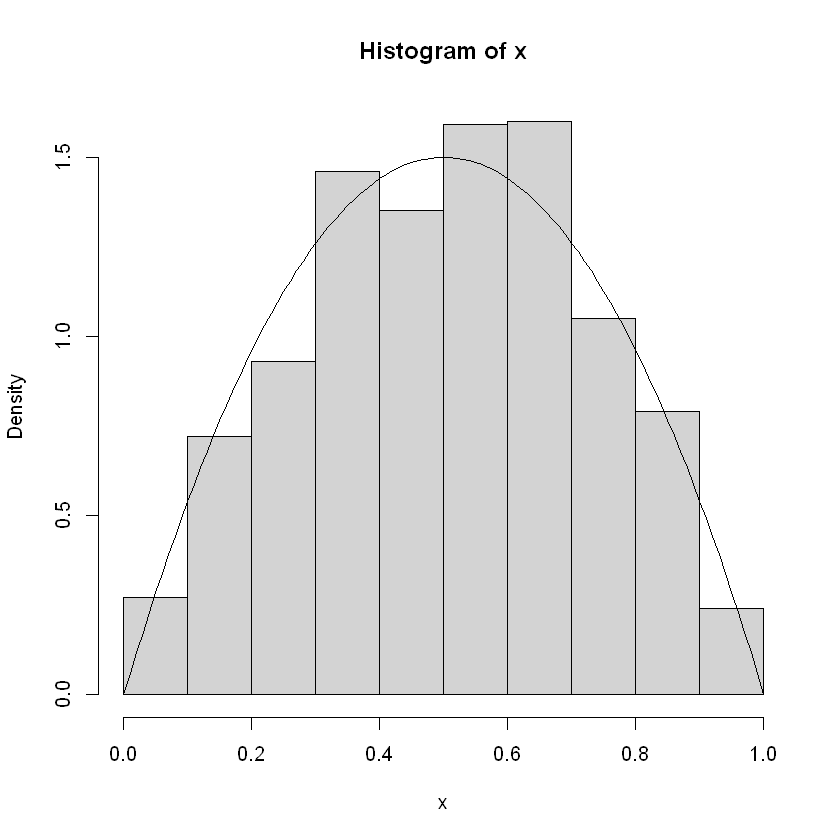

In [23]:
n = 1000  # 题目要求的样本数目
k = 0  # 初始化满足要求的样本数目
j = 0  # 初始化循环次数
x = numeric(n) # 初始化样本列表
while(k < n){   # 生成最多n个数，如果你想得到1000个随机数，n可设置为2000
  u = runif(1)  # 生成u，注意这里只要一个值
  j = j + 1  # 每循环一次+1
  y = runif(1)  # 生成服从g(x)的样本数据
  if(y * (1 - y) > u){  # 满足则接受，否则跳过，开始下一次循环
    k = k + 1  # 满足的样本数据个数+1
    x[k] = y  # 记录满足的样本数据
  }
}
hist(x,prob=T)  # 绘制直方图
xx = seq(0,1,0.01)
yy = 6 * xx *(1 - xx)  # 绘制真实的密度曲线
lines(xx,yy)

### 2.4离散型例题

<div align="center">
	<img src="6.png" width="60%">
</div>

这里使用$max(\mathbf{f}\left(\mathbf{x}\right))$是很自然的，$\mathbf{f}\left(\mathbf{x}\right)\,\mathbf{\,}\leq\,\mathbf{c}\mathbf{g}\left(\mathbf{x}\right)$ 的意思就是$max(\mathbf{f}\left(\mathbf{x}\right))\,\mathbf{\,}\leq\,\mathbf{c}\mathbf{g}\left(\mathbf{x}\right)$ 

In [26]:
n = 1000
k = 0  # 初始化
j = 0  # 循环次数计数
x = numeric(n) # 生成n个0
p = c(0.3, 0.4, 0.3)  # (x)
while(k < n){   # while次数不固定 for次数固定
  u = runif(1)
  j = j + 1
  y = sample(0:2, 1, replace = T) # 在0-2之间随机抽样，反正它是均匀的，其实runif(1,0,2)也可以
  if(u < p[y+1]/(0.4)){
    k = k + 1
    x[k] = y
  }
}
random_p = table(x)/n  # 计算每个数字出现的频率
rbind(random_p,p)  # 将其与实际分布列对比


,0,1,2
random_p,0.311,0.414,0.275
p,0.300,0.400,0.300


# 3.变换法

### 3.1 原理

感觉没什么原理，只需要你扎实地掌握概率论的知识。下面列举一些常用的分布变换：

<div align="center">
	<img src="7.png" width="60%">
</div>


### 3.2 例题

<div align="center">
	<img src="8.png" width="70%">
</div>


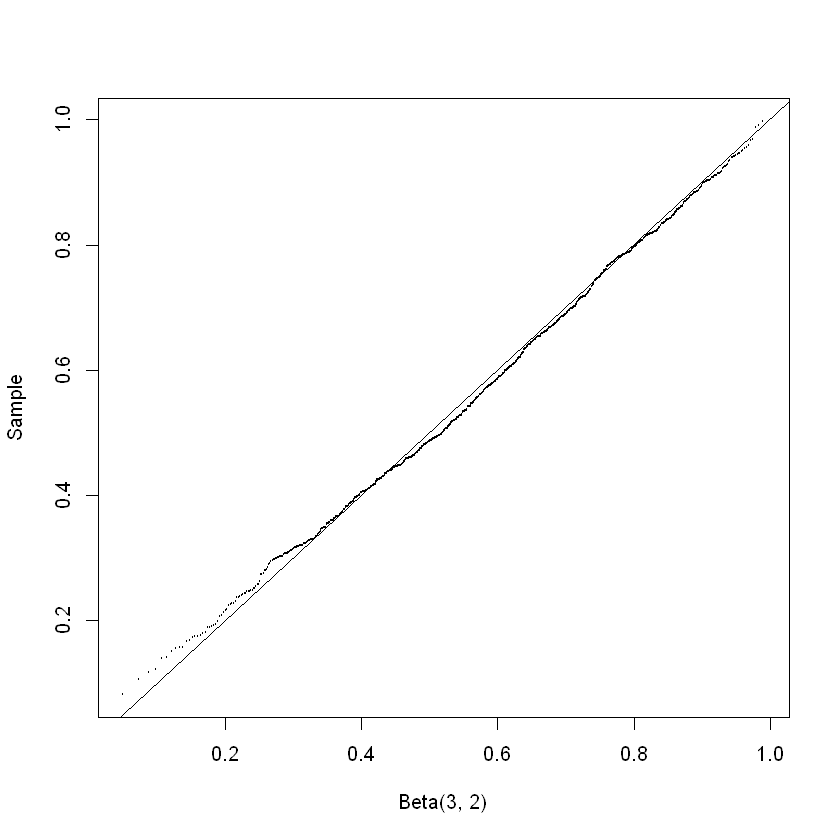

In [27]:
n <- 1000 
a <- 3 
b <- 2 
u <- rgamma(n, shape=a, rate=1) 
v <- rgamma(n, shape=b, rate=1) 
x <- u / (u + v)
# 画图比较一下
q <- qbeta(ppoints(n), a, b) 
qqplot(q, x, cex=0.25, xlab="Beta(3, 2)", ylab="Sample") 
abline(0, 1)

# 4.混合变换

### 4.1卷积相加

以正态分布为例，两个正态分布相加并不是简单的数值相加，而是卷积相加。

<div align="center">
	<img src="10.png" width="70%">
</div>

### 4.2 卷积相加例题

计算自由度为2的卡方分布，即两个正态分布的平方的加总。

In [1]:
n = 1000
nu = 2
X = matrix(rnorm(n*nu),n,nu)^2 # 生成两列服从正态分布的数据
y = rowSums(X) # 这是一种方法
# y = apply(X,MARGIN = 1,FUN = sum) # 第二种方法
# y即是生成的服从卡方分布的随机数

### 4.3 混合相加
<div align="center">
	<img src="9.png" width="40%">
</div>

### 4.4 混合相加例题
<div align="center">
	<img src="11.png" width="50%">
</div>

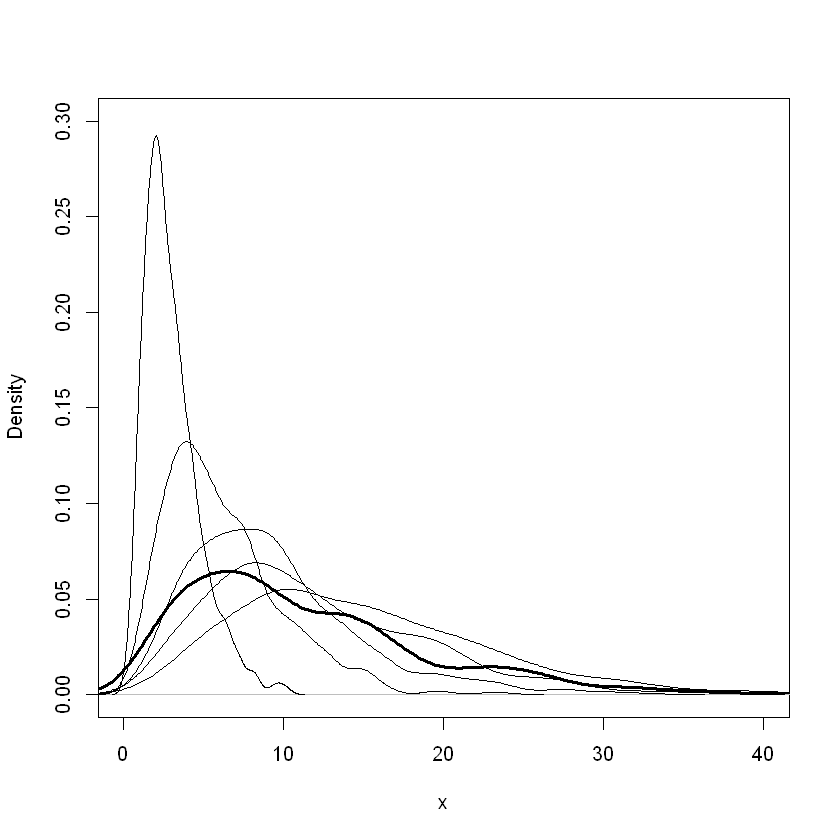

In [4]:
n = 1000
k = sample(1:5,size=n,replace=TRUE,prob=(1:5)/15) # 可以重复抽样
rate = 1/k
x = rgamma(n,shape=3,rate=rate) 
plot(density(x),xlim=c(0,40),ylim=c(0,.3),lwd=3,xlab="x",main="") # 画混合的密度以及分量的密度
for(i in 1:5){lines(density(rgamma(n,3,1/i)))}

### 4.5 卷积与混合的区别

<div align="center">
	<img src="12.png" width="50%">
</div>

# 5.多元正态分布

### 5.1理论基础
假设Z是一个标准多元正态分布，那么Z的线性函数的分布可以表达为：
$$C Z+b\sim N_{d}(b,C C^{T})$$
如果存在$\mathbf{\bm{\Sigma}}=C C^{T}$，则有
$$C Z+\mu\sim N_{d}(\mu,\bm{\Sigma})$$
$C Z+\mu$就是我们要求的变量

### 5.2计算步骤

1、生成标准正态分布随机数Z

2、求出协方差矩阵的三角分解矩阵C

3、根据 X = μ + C Z ，将第一步生成的随机数转化为普通多元正态分布的随机数

### 5.3分解方法1——谱分解
<div align="center">
	<img src="13.png" width="50%">
</div>

这里$\Sigma$即是定义中的A，由于${\Sigma}^{1/2}$可以对角化，并且有$\Sigma^{1/2}=P\Lambda^{1/2}P^{-1}$，所以$$(P\Lambda^{1/2}P^{-1})^T P\Lambda^{1/2}P^{-1}=\Sigma$$
因此，$C=P\Lambda^{1/2}P^{-1}$即为所求。

**注意**：不能对角化的矩阵不能进行谱分解。

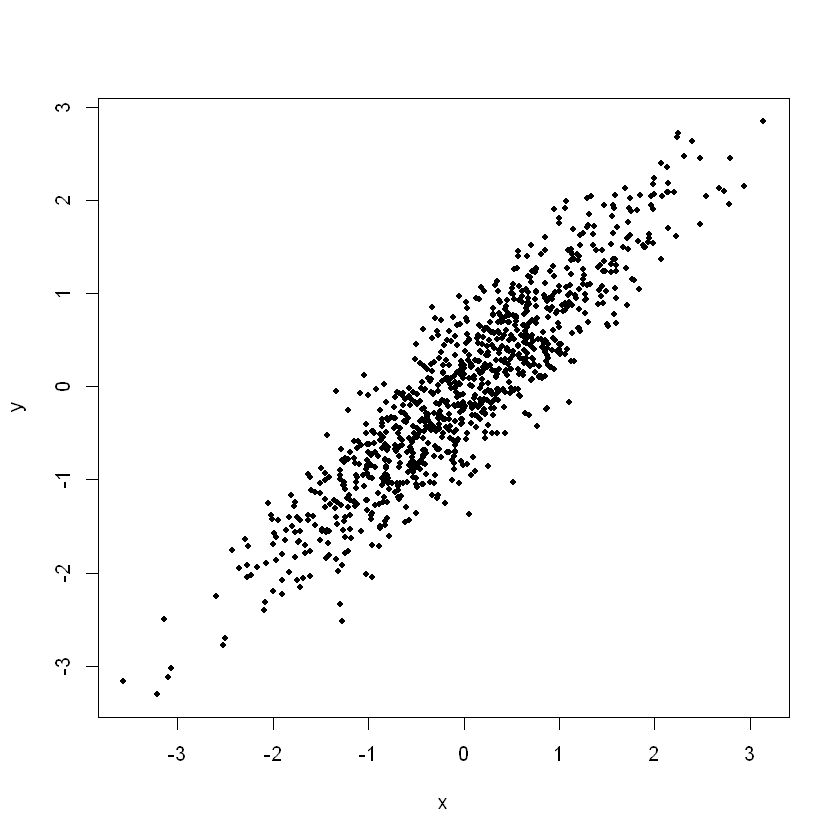

In [14]:
rmvn.eigen = function(n, mu, Sigma) {
    d = length(mu) 
    ev = eigen(Sigma, symmetric = TRUE) 
    lambda = ev$values 
    V = ev$vectors
    R = V %*% diag(sqrt(lambda)) %*% t(V) # 这个是C
    Z = matrix(rnorm(n*d), nrow = n, ncol = d) # 生成多元正态的随机数
    X = Z %*% R + matrix(mu, n, d, byrow = TRUE)
    X
}

mu = c ( 0 , 0 )
Sigma = matrix ( c ( 1 ,0.9 ,0.9 , 1 ) , nrow = 2 , ncol = 2)
X = rmvn.eigen ( 1000 , mu , Sigma )
plot ( X , xlab = " x " , ylab = " y " , pch = 20 )

### 5.4 分解方法2——奇异值分解
<div align="center">
	<img src="14.png" width="60%">
</div>

后面的步骤是类似的，设D是m*n的矩阵。有$\Sigma^{1/2}=U D^{1/2}V^{-1}$，所以$$(U D^{1/2}V^{-1})^T U D^{1/2}V^{-1}=\Sigma$$
因此，$C=U D^{1/2}V^{-1}$即为所求。


In [10]:
rmvn.svd =function(n, mu, Sigma)
{
d = length(mu)
S = svd(Sigma)
Z = matrix(rnorm(n*d), nrow=n, ncol=d)
X = Z %*% R + matrix(mu, n, d, byrow=TRUE)
X
}

### 5.5分解方法3——Choleski分解

实对称正定矩阵的Choleski分解是
$$X=Q^{T}Q$$
其中Q是上三角矩阵.

它要求矩阵的所有特征值必须大于零，故分解的下三角的对角元也是大于零的。这种方法在R中有专门的包可用。

In [11]:
rmvn.Choleski <- function(n, mu, Sigma)
{
d <- length(mu)
Q <- chol(Sigma)
Z <- matrix(rnorm(n*d), nrow=n, ncol=d)
X <- Z %*% Q + matrix(mu, n, d, byrow=TRUE)
X
}

### 5.6其他计算方法

In [15]:
library(MASS)
mvrnorm(n = 1, mu, Sigma, tol = 1e-6, empirical = FALSE, EISPACK = FALSE)

[1] 1.6667978 0.5408812

In [22]:
library(mvtnorm)
rmvnorm(n = 1, mu, Sigma, method=c("eigen","svd","chol"), pre0.9_9994 = FALSE, checkSymmetry = TRUE)

-1.275495,-1.479303


我们发现，Choleski分解是运行速度最快的，谱分解次之，而rmvnorm则是最慢的。

### 5.7多元正态混合抽样

In [27]:
library(MASS)
loc.mix = function(n,p,mu1,mu2,Sigma){
    n1 = rbinom(1,size = n,prob = p)
    n2 = n-n1 # 按频率加总
    x1 = mvrnorm(n1,mu = mu1,Sigma)
    x2 = mvrnorm(n2,mu = mu2,Sigma)
    X = rbind(x1,x2)
    return(X[sample(1:n),])
}